In [5]:
# 기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0


## MNIST dataset

In [36]:
# hyper parameter
learning_rate = 0.01
epochs = 5
batch_size = 200

IMG_HEIGHT = 28
IMG_WIDTH = 28

mnist train :  (60000, 28, 28)
mnist test  :  (10000, 28, 28)
train :  (60000, 28, 28)
test  :  (10000, 28, 28)


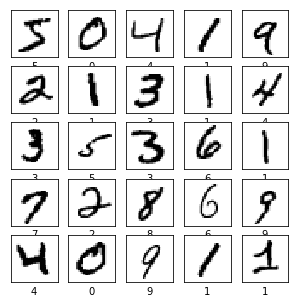

In [70]:
#mnist dataset
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

print("mnist train : ", train_images.shape)
print("mnist test  : ", test_images.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_x = np.expand_dims(train_images, axis=-1)
test_x = np.expand_dims(test_images, axis=-1)
train_y = train_labels
test_y = test_labels

## train 10000, test 1000 개만으로 test
train_x = train_x[:10000]
test_x = test_x[:1000]
train_y = train_y[:10000]
test_y = test_y[:1000]


print("train : ", train_images.shape)
print("test  : ", test_images.shape)

In [48]:
#Create the model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)              

In [49]:
#Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)

Train on 10000 samples, validate on 1000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 509us/sample - loss: 1.8655 - accuracy: 0.3053 - val_loss: 1.2745 - val_accuracy: 0.4550
Epoch 2/5
10000/10000 [==============================] - 5s 466us/sample - loss: 0.8736 - accuracy: 0.6642 - val_loss: 0.6593 - val_accuracy: 0.7850
Epoch 3/5
10000/10000 [==============================] - 5s 473us/sample - loss: 0.4142 - accuracy: 0.8766 - val_loss: 0.3673 - val_accuracy: 0.8900
Epoch 4/5
10000/10000 [==============================] - 5s 456us/sample - loss: 0.2827 - accuracy: 0.9218 - val_loss: 0.2749 - val_accuracy: 0.9170
Epoch 5/5
10000/10000 [==============================] - 5s 477us/sample - loss: 0.2283 - accuracy: 0.9370 - val_loss: 0.2367 - val_accuracy: 0.9280


In [50]:
#Test  the Model
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print("predic = " , predicted)
print("test_y=", test_y)

loss= 0.23667967891693115
acc= 0.928
predic =  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 7 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 8 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 3 9 8 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 8 8 7 2 3 0 6 4 2 4 1 9 5 7 7 2 2 2
 0 8 8 7 7 3 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 6 8 1 2 4 0 2 9 4 3 3 0 0 3 1 9 6 5 2 5 7 8 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 8 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 7 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 5 0 0 3 0
 8 0 6 4 3 3 3 3 2 3 9 1 2 5 8 0 5 6 6 6 3 8 8 2 7 5 

In [53]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

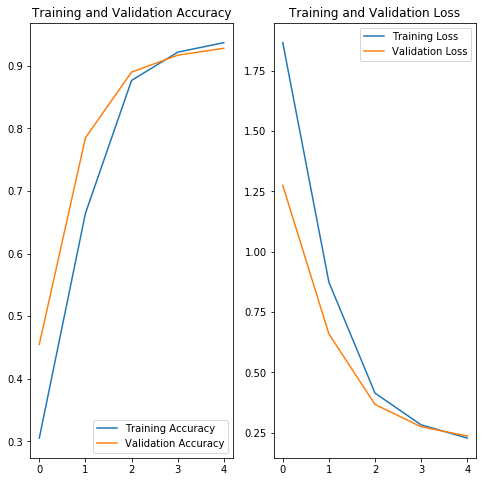

In [54]:
#Visualize the model
plot_history(history)

# CIFAR10 적용

refered https://www.cs.toronto.edu/~kriz/cifar.html


In [110]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()    

print("cifar10 train : ", train_images.shape)
print("cifar10 test  : ", test_images.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


cifar10 train :  (50000, 32, 32, 3)
cifar10 test  :  (10000, 32, 32, 3)


In [111]:
# hyper parameter
learning_rate = 0.01
epochs = 5
batch_size = 200

IMG_HEIGHT = 32
IMG_WIDTH = 32

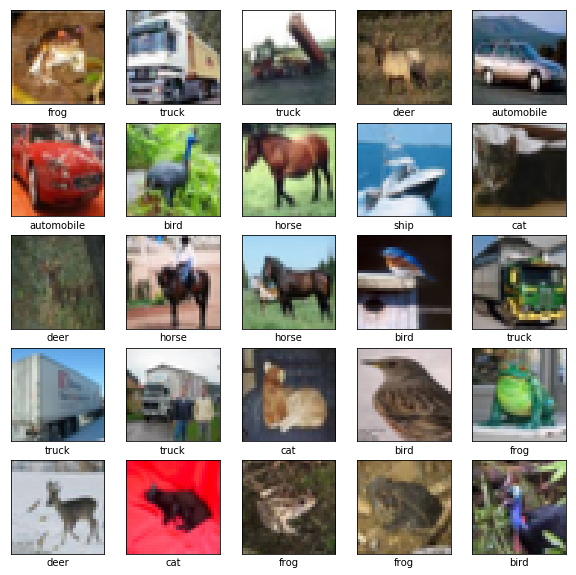

In [112]:
#
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [113]:
#
train_x = train_images
test_x = test_images
train_y = train_labels
test_y = test_labels

## train 10000, test 1000 개만으로 test
#train_x = train_x[:10000]
#test_x = test_x[:1000]
#train_y = train_y[:10000]
#test_y = test_y[:1000]

print("train : ", train_x.shape)
print("test  : ", test_y.shape)

train :  (50000, 32, 32, 3)
test  :  (10000, 1)


In [114]:
#Create the model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1024)            

In [115]:
#Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 31s 627us/sample - loss: 2.0650 - accuracy: 0.1869 - val_loss: 1.8293 - val_accuracy: 0.2389
Epoch 2/5
50000/50000 [==============================] - 31s 617us/sample - loss: 1.7782 - accuracy: 0.2713 - val_loss: 1.7476 - val_accuracy: 0.2905
Epoch 3/5
50000/50000 [==============================] - 31s 615us/sample - loss: 1.6786 - accuracy: 0.3214 - val_loss: 1.6003 - val_accuracy: 0.3515
Epoch 4/5
50000/50000 [==============================] - 31s 617us/sample - loss: 1.5650 - accuracy: 0.3682 - val_loss: 1.5346 - val_accuracy: 0.3739
Epoch 5/5
50000/50000 [==============================] - 31s 629us/sample - loss: 1.4926 - accuracy: 0.4053 - val_loss: 1.4683 - val_accuracy: 0.4157


In [116]:
loss, acc = model.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 1.468318296432495
acc= 0.4157


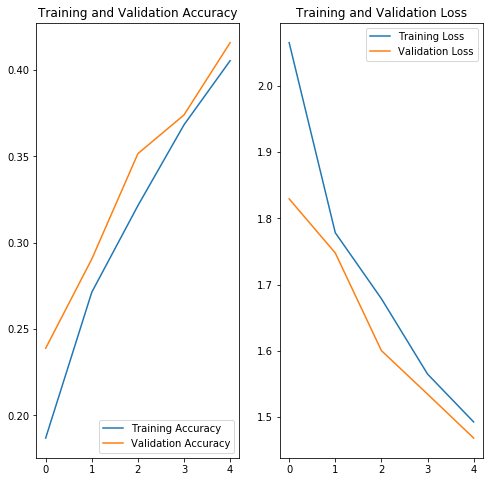

In [117]:
#Visualize the model
plot_history(history)

## image augmentation


ImageDataGenerator를 사용

In [118]:
# image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False 
)
# ADDED END

In [119]:
#Create the model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1024)            

In [120]:
#Train the model
#history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)
history = model.fit_generator(datagen.flow(train_x, train_y,batch_size=batch_size), epochs=epochs)

loss, acc = model.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)


Epoch 1/5
250/250 [==============================] - 46s 186ms/step - loss: 2.0884 - accuracy: 0.2103
Epoch 2/5
250/250 [==============================] - 47s 188ms/step - loss: 1.6723 - accuracy: 0.3713
Epoch 3/5
250/250 [==============================] - 47s 190ms/step - loss: 1.5540 - accuracy: 0.4168
Epoch 4/5
250/250 [==============================] - 47s 189ms/step - loss: 1.4873 - accuracy: 0.4412
Epoch 5/5
250/250 [==============================] - 47s 188ms/step - loss: 1.4413 - accuracy: 0.4609
loss= 1.4105569246292113
acc= 0.4728
